In [9]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from sklearn.datasets import load_iris, load_diabetes
from pypadre.binding.metrics import sklearn_metrics
from pypadre.examples.base_example import example_app

In [10]:
# create example app
app = example_app()

predictions = []
idx= 0
matrix = []
missclassification_matrix = []
metrics = []
names = []
grid_parameters = []
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                      'petal width (cm)', 'class']
columns = ["Age",
    "Sex",
    "Body mass index",
    "Average blood pressure",
    "S1",
    "S2",
    "S3",
    "S4",
    "S5",
    "S6",
    "progression"]
    
columns_banknotes = [
    "variance",
    "skewness",
    "kurtosis",
    "entropy",
    "class"
]

columns_abalone=[
    
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"

]

# Define the dataset
@app.dataset(name="iris", columns=cols, target_features='class')
def dataset():
    
    data = load_iris().data
    target = load_iris().target.reshape(-1, 1)
    return np.append(data, target, axis=1)
    
    #return np.loadtxt('data_banknote_authentication', delimiter=",", usecols=range(9))



In [11]:
# Create the reference
from pypadre.core.model.code.code_mixin import PythonPackage, PythonFile, GitIdentifier, Function
from pathlib import Path


path = os.path.abspath('')
git_repo = str(Path(path).parent)
reference = PythonFile(path=str(Path(path).parent), package=path[len(git_repo) + 1:],
                             variable="function_name",
                             repository_identifier=GitIdentifier(path=git_repo))



In [12]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'SVC': {'kernel': ['rbf', 'sigmoid', 'linear'], 'C': [0.1, 0.5, 1.5], 'tol': [.1, .3],
                                                       'gamma':['auto', 2]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris SVC - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    estimators = [('SVC', SVC(probability=True, C=1.0))]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating bed60469-a862-485a-95ad-a952a5ac8135 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 709d9974-6263-4a59-a48c-7a90e641e1e7 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating ab8819db-1806-4317-8fda-505db6afd64d done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 0adc9361-6817-4643-852b-8766878b70e4 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 62375f9b-c3e5-4486-8423-37eed0c52b88 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 184bc63b-05c7-422d-8292-c2ce47c452e7 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 

In [13]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]
for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [14]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'k-nn classifier': {'n_neighbors': [1, 3, 5, 7, 9, 11],
                                                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris KNN - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.neighbors import KNeighborsClassifier
    estimators = [('k-nn classifier', KNeighborsClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating d1b0c79d-ccec-437a-b2af-664c6ee5fb10 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating f927722b-a518-47dc-a949-a557192f288d done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 747d1fbe-b2e8-4c5d-8f21-a012c7f74da7 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating f13911dd-5b00-44c5-9b12-6c8765b25460 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 66b38b68-dce3-4855-860e-42439fa29ccf done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating d177698d-1b90-4c5b-8cc5-b20df0e99008 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 

In [15]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [16]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'gaussian process classification': {'max_iter_predict': [50, 100, 130],
                                                                                    'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris GPC - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.gaussian_process.gpc import GaussianProcessClassifier
    estimators = [('gaussian process classification', GaussianProcessClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 5ff0fe06-5fd6-453f-9959-5558d3b41bcf done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 897cd29a-8416-4d30-9383-8c6b5ae2cb9b done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating ba4de5c7-24ca-4843-85c3-5f666d761003 done.


In [17]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions')) 
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)   
    names.append(experiment.name)

In [18]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'decision tree classifier': {'max_depth_tree': [5, 10, 15],
                                                                                    'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Decision Tree - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.tree.tree import DecisionTreeClassifier
    estimators = [('decision tree classifier', DecisionTreeClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating a1e60a15-17dc-4a7c-8340-a35b1c3e3604 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 632eb371-6ba3-47ce-b953-8e2e8af1ab0f done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 671606b3-c353-46ad-b923-23e8bc25a1e7 done.


In [19]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [20]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'random forest classifier': {'num_estimators': [3, 5, 9, 11],
                                                                             'max_depth_tree': [2, 8, 14],
                                                                             'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Random Forest - Grid Search with Static Seed", seed=1, project_name="Examples",
                allow_metrics = True, 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble.forest import RandomForestClassifier
    estimators = [('random forest classifier', RandomForestClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 78e9e63e-763b-44be-b051-fe14ff44cb82 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 0dc2836e-0be4-49a3-bf2a-affab21253f1 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 24d6bf4f-e2af-4359-8b5a-814c01e30874 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 3300058a-93f6-4536-a2aa-76347ce25d0f done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 2eab4eeb-1bb9-4d1f-ad99-7b813acc109e done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 7b87986b-6525-48f2-9152-99336931b7fb done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 

In [21]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)


In [22]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'multi-layer perceptron classifier': {'activation': ['relu', 'tanh'],
                                                                             'solver': ['sgd', 'adam'],
                                                                             'batch_size': [2, 20],
                                                                             'learning_rate_init': [0.001, 0.01]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris MLP - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.neural_network.multilayer_perceptron import MLPClassifier
    estimators = [('multi-layer perceptron classifier', MLPClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating f5bb18d0-b96d-4c9e-ba3b-52a8764cf0b1 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating f3f733e4-4f28-4ebe-a880-690db78b5cdf done.


/home/christofer/PycharmProjects/interface/PyPaDrE/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 6d439c5d-f30d-4af6-9263-c74df5b0ba62 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 4583465e-8fa3-479f-a3f3-0a0bd226b509 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating ea3bcb1f-6856-4f72-89dc-7ec0c27814f4 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating fd5542cd-fb74-4827-97e3-680e01ea78da done.


/home/christofer/PycharmProjects/interface/PyPaDrE/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 6e005707-f458-4e21-87b9-0da95967c165 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 0a2e588f-5bbb-4012-8c87-34f16924a371 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 5deb6c47-4304-401a-aee9-8180a5c94da5 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 0deccc21-9c87-4d16-a069-8fe96646c148 done.


/home/christofer/PycharmProjects/interface/PyPaDrE/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating aa191431-1a8c-49d8-9292-d4e9f5f4c31f done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating ebf1dac5-870e-4cda-92f8-6f31b5a74c84 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating c0352ecb-9d5a-4f76-a3b0-623d378df6d4 done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 07ca5071-8b3b-4dc5-adb8-1c6193b141f1 done.


/home/christofer/PycharmProjects/interface/PyPaDrE/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 825c86fd-299e-409d-bc2d-b309cb34349f done.
Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 0dbb6c68-8368-47c9-8732-cc1ea5cc9451 done.


In [23]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [24]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'AdaBoost classifier': {'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Adaboost - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble.weight_boosting import AdaBoostClassifier
    estimators = [('AdaBoost classifier', AdaBoostClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation: Classification Metrics, Confusion Matrix
Calculating 03af300b-e783-44b1-b687-3d297974ab09 done.


In [25]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [26]:
# Get the indices of experiments that satisfy the f1 range
f1_min = 0.8
f1_max = 1
idx_list = []
f1_score = []
idx = 0
for metric in metrics:
    for key in metric:
        if len(metric.get(key)) > 0:
            curr_value = metric.get(key)[1].get('f1_score')
            
    if f1_min <= curr_value <= f1_max:
        idx_list.append(idx)
        f1_score.append(curr_value)
        
    idx += 1           


print(idx_list)
print(len(idx_list))
print(len(metrics))
print(f1_score)


[1, 2, 3, 4, 6, 8, 10, 11, 12, 15, 17, 18, 19, 21, 23, 24, 25, 26, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
83
95
[1.0, 0.9440559440559441, 0.9717813051146384, 0.9709618874773139, 0.9709618874773139, 0.9709618874773139, 0.9428571428571427, 0.9407407407407407, 0.9153439153439153, 1.0, 0.9440559440559441, 0.9440559440559441, 0.9709618874773139, 0.9440559440559441, 0.9440559440559441, 0.9717813051146384, 0.9440559440559441, 0.9440559440559441, 0.9709618874773139, 0.9407407407407407, 0.9709618874773139, 0.9428571428571427, 0.9440559440559441, 0.9153439153439153, 0.9428571428571427, 0.9153439153439153, 0.9709618874773139, 0.9153439153439153, 0.8857142857142858, 0.9428571428571427, 0.9153439153439153, 0.8857142857142858, 0.9428571428571427, 0.9428571428571427, 0.91534391534391

In [28]:
modified_predictions = [predictions[idx] for idx in idx_list]
matrix = np.zeros([len(modified_predictions), len(modified_predictions)])
missclassification_matrix = np.zeros([len(modified_predictions), len(modified_predictions)])
for idx in range(0, len(modified_predictions)):
    curr_dictionary = modified_predictions[idx]
    total_predictions = len(list(modified_predictions[idx].keys()))
    curr_missclassification_row = []
    total_missclassifications = 0
    for inner_idx in range(0, len(modified_predictions)):
        
        total_predictions = len(list(modified_predictions[idx].keys()))
        curr_missclassification_row = []
        total_missclassifications = 0
        
        identical_predictions = 0
        missclassified = 0
        for key in (modified_predictions[idx].keys()):
            target_prediction_dict = modified_predictions[inner_idx].get(key)
            if target_prediction_dict is not None:
                target_prediction = target_prediction_dict.get('predicted')
            source_prediction = modified_predictions[idx].get(key).get('predicted')
            truth  = modified_predictions[idx].get(key).get('truth')
            if source_prediction == target_prediction:
                
                if source_prediction != truth:
                    missclassified += 1
                    
                else:
                    identical_predictions += 1
            
            if source_prediction != truth:
                total_missclassifications += 1
                
        if total_missclassifications == 0:
            total_missclassifications = 1
            missclassified = 1
        
        print(names[idx]+"/"+names[inner_idx])
        print(missclassified)
        print(total_missclassifications)
        print(missclassified/total_missclassifications)
        print(identical_predictions)
        print(total_predictions)
        print(identical_predictions/total_predictions)
        print("-----------------------------------------------------------------------------")
                
        
            
        missclassification_matrix[idx][inner_idx] = (missclassified/total_missclassifications)
        missclassification_matrix[inner_idx][idx] = (missclassified/total_missclassifications)
        #missclassification_matrix[idx][idx] = 0
        matrix[idx][inner_idx] = identical_predictions/total_predictions
        matrix[inner_idx][idx] = identical_predictions/total_predictions                  
        

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
38
38
1.0
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Sear

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris 

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
37
38
0.9736842105263158
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
1
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris 

0.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
0
2
0.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
2
0.5
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
2
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
2
1.0
35
38
0.9210526315789473
----------------

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
2
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
2
0.5
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
2
0.5
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
2
0.5
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris 

Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
33
38
0.868421052631579
--------------------------------------------------------------------------

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
3
0.3333333333333333
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
3
0.6666666666666666
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris SVC - Grid

2
0.5
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
32
38
0.8421052631578947
--------------

0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
3
0.3333333333333333
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
3
0.3333333333333333
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
3
0.3333333333333333
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
3
0.3333333333333333
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed

38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
3
0.6666666666666666
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
3
0.6666666666666666
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
3
3
1.0
35
38
0.9210526315

0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris GPC - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
--------------------------------

Iris KNN - Grid Search with Static Seed/Iris MLP - Grid Search with Static Seed
2
5
0.4
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris MLP - Grid Search with Static Seed
2
5
0.4
31
38
0.8157894736842105
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris MLP - Grid Search with Static Seed
5
5
1.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
0
5
0.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
5
0.2
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris KNN - Grid Search with Static Seed/Iris SVC

0.868421052631579
-----------------------------------------------------------------------------
Iris GPC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
5
0.2
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris GPC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
5
0.4
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris GPC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
5
0.2
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris GPC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
2
5
0.4
32
38
0.8421052631578947
-----------------------------------------------------------------------------
Iris GPC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
1
5
0.2
33
38
0.868421052631579
----------------------------

1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
2
2
1.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris KNN - Grid Search with Static Seed
0
2
0.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris KNN - Grid Search with Static 

36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
33
38
0.868421052631579
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
2
2
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
2
2
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris

0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
2
2
1.0
35
38
0.9210526315789473
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
1
2
0.5
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
0
2
0.0
34
38
0.8947368421052632
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
2
2
1.0
36
38
0.9473684210526315
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static 

In [29]:
matrix

array([[1.        , 0.94736842, 0.97368421, ..., 0.94736842, 0.89473684,
        0.86842105],
       [0.94736842, 0.94736842, 0.94736842, ..., 0.92105263, 0.89473684,
        0.84210526],
       [0.97368421, 0.94736842, 0.97368421, ..., 0.94736842, 0.89473684,
        0.86842105],
       ...,
       [0.94736842, 0.92105263, 0.94736842, ..., 0.94736842, 0.89473684,
        0.86842105],
       [0.89473684, 0.89473684, 0.89473684, ..., 0.89473684, 0.89473684,
        0.81578947],
       [0.86842105, 0.84210526, 0.86842105, ..., 0.86842105, 0.81578947,
        0.86842105]])

In [30]:
missclassification_matrix

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  , ..., 0.5 , 0.5 , 0.2 ],
       [0.  , 1.  , 1.  , ..., 0.5 , 0.25, 0.2 ],
       ...,
       [0.  , 0.5 , 0.5 , ..., 1.  , 0.5 , 0.4 ],
       [0.  , 0.5 , 0.25, ..., 0.5 , 1.  , 0.4 ],
       [0.  , 0.2 , 0.2 , ..., 0.4 , 0.4 , 1.  ]])

In [31]:
modified_name = []
for idx in idx_list:
    name = names[idx]
    for key in grid_parameters[idx]:
        temp = grid_parameters[idx].get(key)
        if temp:
            params = str(grid_parameters[idx].get(key))
            estimator_name_idx = str(grid_parameters[idx].get(key)).find('.')
            estimator_name = str(grid_parameters[idx].get(key))[2:estimator_name_idx+1]
            
    modified_name.append(name.replace('Iris ', "").replace(" - Grid Search with Static Seed", "") + params.replace(estimator_name, ""))
    
print(modified_name)

["SVC{'kernel': 'linear', 'C': 0.5, 'tol': 0.1, 'gamma': 2}", "SVC{'kernel': 'rbf', 'C': 0.1, 'tol': 0.3, 'gamma': 2}", "SVC{'kernel': 'rbf', 'C': 1.5, 'tol': 0.3, 'gamma': 'auto'}", "SVC{'kernel': 'linear', 'C': 0.1, 'tol': 0.1, 'gamma': 'auto'}", "SVC{'kernel': 'rbf', 'C': 0.1, 'tol': 0.3, 'gamma': 'auto'}", "SVC{'kernel': 'linear', 'C': 0.1, 'tol': 0.3, 'gamma': 2}", "SVC{'kernel': 'rbf', 'C': 0.5, 'tol': 0.3, 'gamma': 2}", "SVC{'kernel': 'rbf', 'C': 0.5, 'tol': 0.3, 'gamma': 'auto'}", "SVC{'kernel': 'rbf', 'C': 1.5, 'tol': 0.3, 'gamma': 2}", "SVC{'kernel': 'linear', 'C': 0.5, 'tol': 0.1, 'gamma': 'auto'}", "SVC{'kernel': 'linear', 'C': 1.5, 'tol': 0.3, 'gamma': 2}", "SVC{'kernel': 'linear', 'C': 1.5, 'tol': 0.1, 'gamma': 'auto'}", "SVC{'kernel': 'rbf', 'C': 0.1, 'tol': 0.1, 'gamma': 'auto'}", "SVC{'kernel': 'rbf', 'C': 0.1, 'tol': 0.1, 'gamma': 2}", "SVC{'kernel': 'linear', 'C': 1.5, 'tol': 0.3, 'gamma': 'auto'}", "SVC{'kernel': 'rbf', 'C': 1.5, 'tol': 0.1, 'gamma': 'auto'}", "SVC{

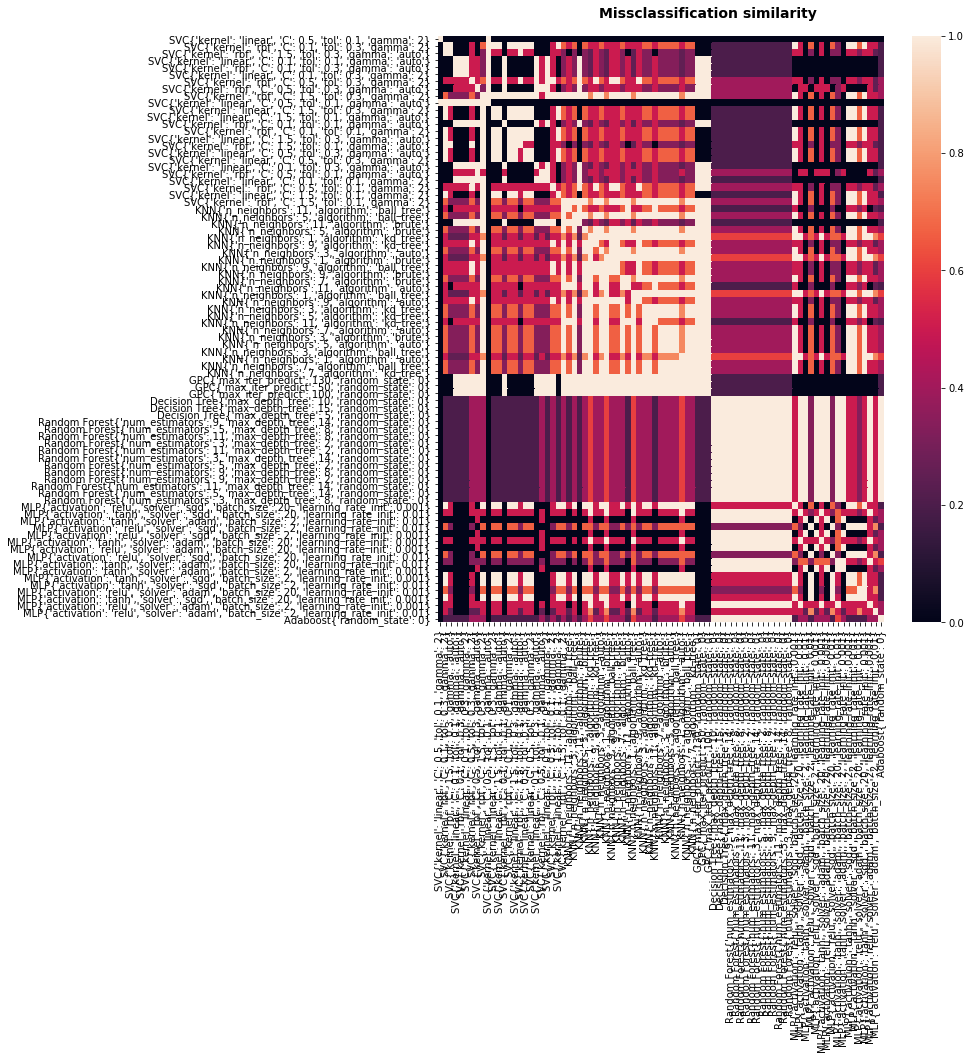

In [32]:
fig4, ax = plt.subplots(figsize=(10, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Missclassification similarity', fontsize=14, fontweight='bold')

sns.heatmap(missclassification_matrix, fmt='.2f', ax=ax, xticklabels=modified_name, yticklabels=modified_name)
plt.savefig("missclassification.png")

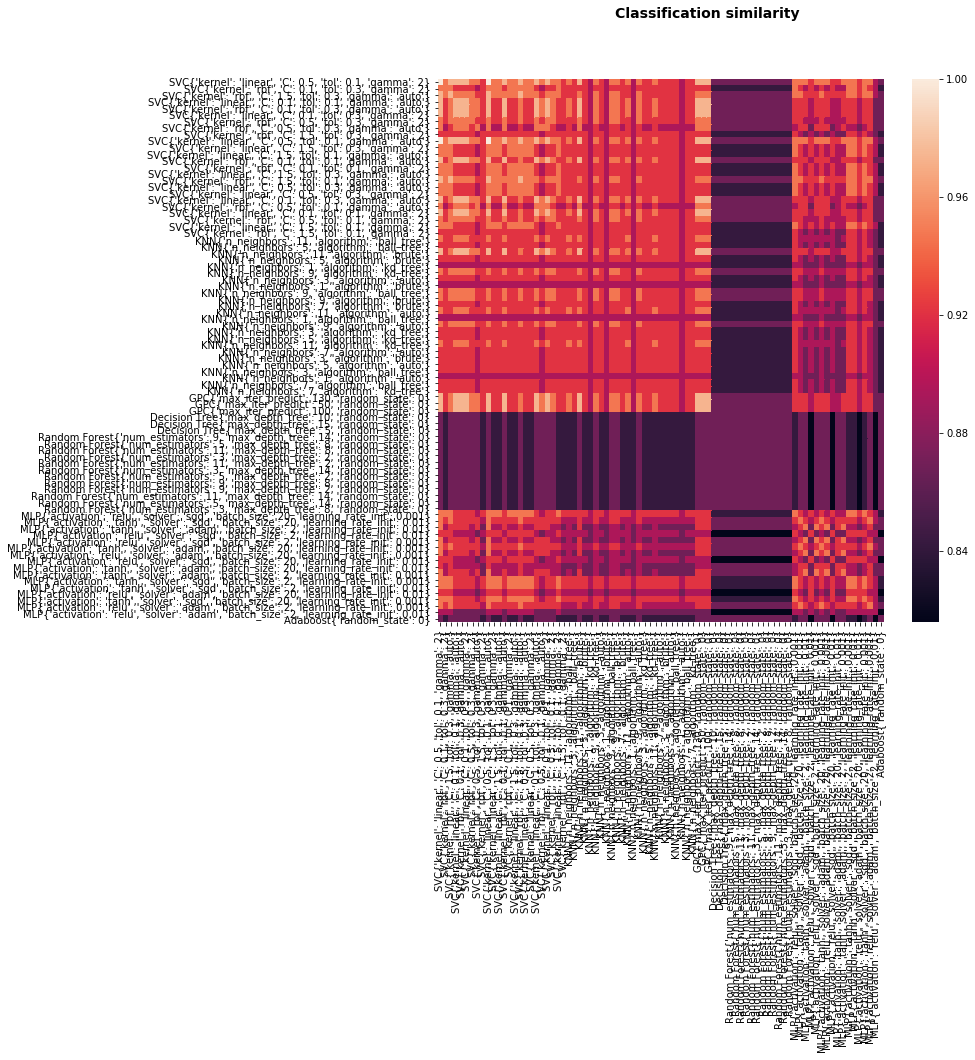

In [33]:
fig5, ax = plt.subplots(figsize=(10, 10))
plt.suptitle('Classification similarity', fontsize=14, fontweight='bold')
sns.heatmap(matrix,xticklabels=modified_name, yticklabels=modified_name);
plt.savefig("classification_similarity.png")

Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
Initial covariance matrix score: -40677.87099617983
Best ordering: [10 81 66 76 77 16 17  1 22 79 69 11 78 13 14 73  5  6 12 49 50 20  3 21
 37 48 26  4 18 29 24 40  8 25 34 30 23 36 38 39 28 41 42 43 44 45 46 47
 82 64 65 51 52 53 54 55 56 57 58 59 60 61 62 63  7 19 68 67 80 31 70 71
 72 33 74 75  9 15 32  2  0 35 27]
Best score: -34328.18895092564
Cluster     [variables assigned to this cluster]
------------------------------------------------


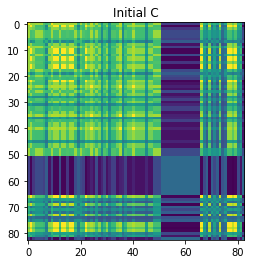

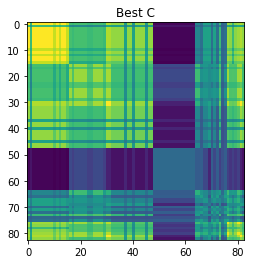

In [34]:
# This generates 100 variables that could possibly be assigned to 5 clusters
n_variables = len(modified_name)
n_clusters = 5
n_samples = 1000

# To keep this example simple, each cluster will have a fixed size
cluster_size = n_variables // n_clusters

# Assign each variable to a cluster
belongs_to_cluster = np.repeat(range(n_clusters), cluster_size)
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
"""
for i in range(n_variables):
    variables.append(
        np.random.randn(n_samples) + latent[belongs_to_cluster[i], :]
    )
"""
variables = np.round(matrix * 100)
#variables = np.array(variables)

C = np.cov(variables)

def score(C):
    '''
    Function to assign a score to an ordered covariance matrix.
    High correlations within a cluster improve the score.
    High correlations between clusters decease the score.
    '''
    score = 0
    for cluster in range(n_clusters):
        inside_cluster = np.arange(cluster_size) + cluster * cluster_size
        outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

        # Belonging to the same cluster
        score += np.sum(C[inside_cluster, :][:, inside_cluster])

        # Belonging to different clusters
        score -= np.sum(C[inside_cluster, :][:, outside_cluster])
        score -= np.sum(C[outside_cluster, :][:, inside_cluster])

    return score


initial_C = C
initial_score = score(C)
initial_ordering = np.arange(n_variables)

plt.figure()
plt.imshow(C, interpolation='nearest')
plt.title('Initial C')
plt.savefig("Before_Clustering.png")
print('Initial ordering:', initial_ordering)
print('Initial covariance matrix score:', initial_score)

# Pretty dumb greedy optimization algorithm that continuously
# swaps rows to improve the score
def swap_rows(C, var1, var2):
    '''
    Function to swap two rows in a covariance matrix,
    updating the appropriate columns as well.
    '''
    D = C.copy()
    D[var2, :] = C[var1, :]
    D[var1, :] = C[var2, :]

    E = D.copy()
    E[:, var2] = D[:, var1]
    E[:, var1] = D[:, var2]

    return E

current_C = C
current_ordering = initial_ordering
current_score = initial_score

max_iter = 1000
for i in range(max_iter):
    # Find the best row swap to make
    best_C = current_C
    best_ordering = current_ordering
    best_score = current_score
    for row1 in range(n_variables):
        for row2 in range(n_variables):
            if row1 == row2:
                continue
            option_ordering = best_ordering.copy()
            option_ordering[row1] = best_ordering[row2]
            option_ordering[row2] = best_ordering[row1]
            option_C = swap_rows(best_C, row1, row2)
            option_score = score(option_C)

            if option_score > best_score:
                best_C = option_C
                best_ordering = option_ordering
                best_score = option_score

    if best_score > current_score:
        # Perform the best row swap
        current_C = best_C
        current_ordering = best_ordering
        current_score = best_score
    else:
        # No row swap found that improves the solution, we're done
        break

# Output the result
plt.figure()
plt.imshow(current_C, interpolation='nearest')
plt.title('Best C')
plt.savefig("clustered.png")
print('Best ordering:', current_ordering)
print('Best score:', current_score)
print('Cluster     [variables assigned to this cluster]')
print('------------------------------------------------')
    

In [35]:
clustered_estimators = []
new_matrix = deepcopy(current_C)
print(new_matrix.shape)
rows_to_delete = []
for cluster in range(n_clusters):
    alternate_estimator_names = []
    last_name = ""
    print('Cluster %02d  %s' % (cluster + 1, current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]))
    for i in current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]:
        temp_name = modified_name[i]
        temp_name = temp_name[:temp_name.find('{')]

        if temp_name != last_name:
            alternate_estimator_names.append(temp_name)
            last_name = temp_name
        else:
            rows_to_delete.append(i)
            new_matrix[:, i] = 0
            new_matrix[i, :] = 0
        #alternate_estimator_names = alternate_estimator_names.union(str(temp_name[:temp_name.find('{')]))
    print(alternate_estimator_names)
    print(len(rows_to_delete))
    clustered_estimators.append(list(alternate_estimator_names))
    
print(clustered_estimators)
print(rows_to_delete)

(83, 83)
Cluster 01  [10 81 66 76 77 16 17  1 22 79 69 11 78 13 14 73]
['SVC', 'MLP', 'SVC', 'MLP', 'SVC', 'MLP', 'SVC', 'MLP']
8
Cluster 02  [ 5  6 12 49 50 20  3 21 37 48 26  4 18 29 24 40]
['SVC', 'GPC', 'SVC', 'KNN', 'GPC', 'KNN', 'SVC', 'KNN']
16
Cluster 03  [ 8 25 34 30 23 36 38 39 28 41 42 43 44 45 46 47]
['SVC', 'KNN', 'SVC', 'KNN']
28
Cluster 04  [82 64 65 51 52 53 54 55 56 57 58 59 60 61 62 63]
['Adaboost', 'Random Forest', 'Decision Tree', 'Random Forest']
40
Cluster 05  [ 7 19 68 67 80 31 70 71 72 33 74 75  9 15 32  2]
['SVC', 'MLP', 'KNN', 'MLP', 'KNN', 'MLP', 'SVC', 'KNN', 'SVC']
47
[['SVC', 'MLP', 'SVC', 'MLP', 'SVC', 'MLP', 'SVC', 'MLP'], ['SVC', 'GPC', 'SVC', 'KNN', 'GPC', 'KNN', 'SVC', 'KNN'], ['SVC', 'KNN', 'SVC', 'KNN'], ['Adaboost', 'Random Forest', 'Decision Tree', 'Random Forest'], ['SVC', 'MLP', 'KNN', 'MLP', 'KNN', 'MLP', 'SVC', 'KNN', 'SVC']]
[66, 76, 77, 17, 1, 22, 69, 14, 6, 12, 50, 3, 21, 18, 24, 40, 34, 30, 38, 39, 28, 41, 42, 43, 44, 45, 46, 47, 65, 52, 5

In [36]:
t = new_matrix[~np.all(new_matrix == 0, axis=1)]
#t = t[~np.all(t == 0, axis=0)]
t = np.delete(t, rows_to_delete, axis=1)
t.shape

(36, 36)

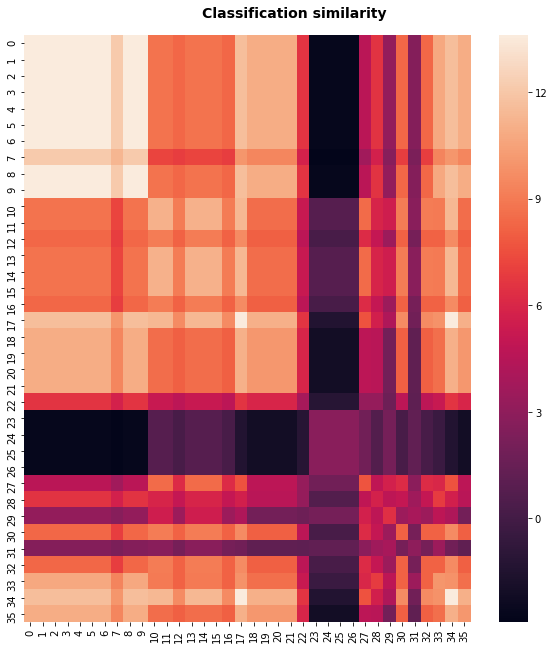

In [37]:
fig4, ax = plt.subplots(figsize=(10, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Classification similarity', fontsize=14, fontweight='bold')

sns.heatmap(t, fmt='.2f', ax=ax)

In [38]:
name

'Iris Adaboost - Grid Search with Static Seed'